# Data Exploration of Myocardial Infarction Dataset

---

**Setup**

In [1]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


---

## Exploring the tabular data 

In [2]:
# read in data 
df_to_explore = pd.read_csv('../data:/training_data/mixed_demographics.csv')
df_to_explore.head()
#TRUE = MALE FALSE = FEMALE

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,False
1,1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,False
2,2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,False
3,3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,True
4,4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,False


In [3]:
# get some basic info on the dataframe
df_to_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    900 non-null    int64  
 1   MI            900 non-null    object 
 2   age           900 non-null    float64
 3   BMI           900 non-null    float64
 4   height        900 non-null    float64
 5   weight        900 non-null    float64
 6   diastolic_BP  900 non-null    float64
 7   systolic_BP   900 non-null    float64
 8   sex           900 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 57.3+ KB


In [4]:
df_to_explore.isnull().sum()

Unnamed: 0      0
MI              0
age             0
BMI             0
height          0
weight          0
diastolic_BP    0
systolic_BP     0
sex             0
dtype: int64

there are no null values in the data set 

In [5]:
df_to_explore["sex"] = df_to_explore["sex"].replace({True: "Male", False: "Female"})
df_to_explore.head()

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,Female
1,1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,Female
2,2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,Female
3,3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,Male
4,4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,Female


In [6]:
# check for duplicate rows in the dataframe
#keep first means that it won't return the first instance of the duplicate in the list of indices 
indexes = df_to_explore.duplicated(keep=False)

#identifies all 'True' values in the series indexes and returns their index 
duplicates_indices = indexes[indexes].index.values

#prints all duplicate columns for visual checking
df_to_explore.iloc[duplicates_indices]

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex


In [7]:
df_to_explore.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900.0,449.500000,259.951919,0.000000,224.750000,449.500000,674.250000,899.000000
age,900.0,64.111860,2.547381,55.591381,62.219253,64.104358,65.858591,74.011208
BMI,900.0,27.619373,1.820852,19.852576,26.414552,27.654454,28.931890,33.291264
height,900.0,169.691638,4.024141,157.371195,167.063936,169.732035,172.411495,182.634448
weight,900.0,79.180642,7.017943,55.985157,73.972783,79.643591,84.443475,98.216702
diastolic_BP,900.0,78.498092,2.571678,70.409270,76.895646,78.367708,80.274086,86.616991
systolic_BP,900.0,138.327642,3.627310,124.172508,136.111341,138.169542,140.637043,149.831843


In [8]:
#drops unnamed: 0 column as this is just an index column

df_to_explore.drop(labels = ["Unnamed: 0"], axis=1, inplace=True)
df_to_explore.head()

,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,Female
1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,Female
2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,Female
3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,Male
4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,Female


In [10]:
#creates vector of numeric feature columns
numeric_feature_columns = df_to_explore.select_dtypes(include=np.number).columns.tolist()
numeric_feature_columns 

['age', 'BMI', 'height', 'weight', 'diastolic_BP', 'systolic_BP']

### Plots

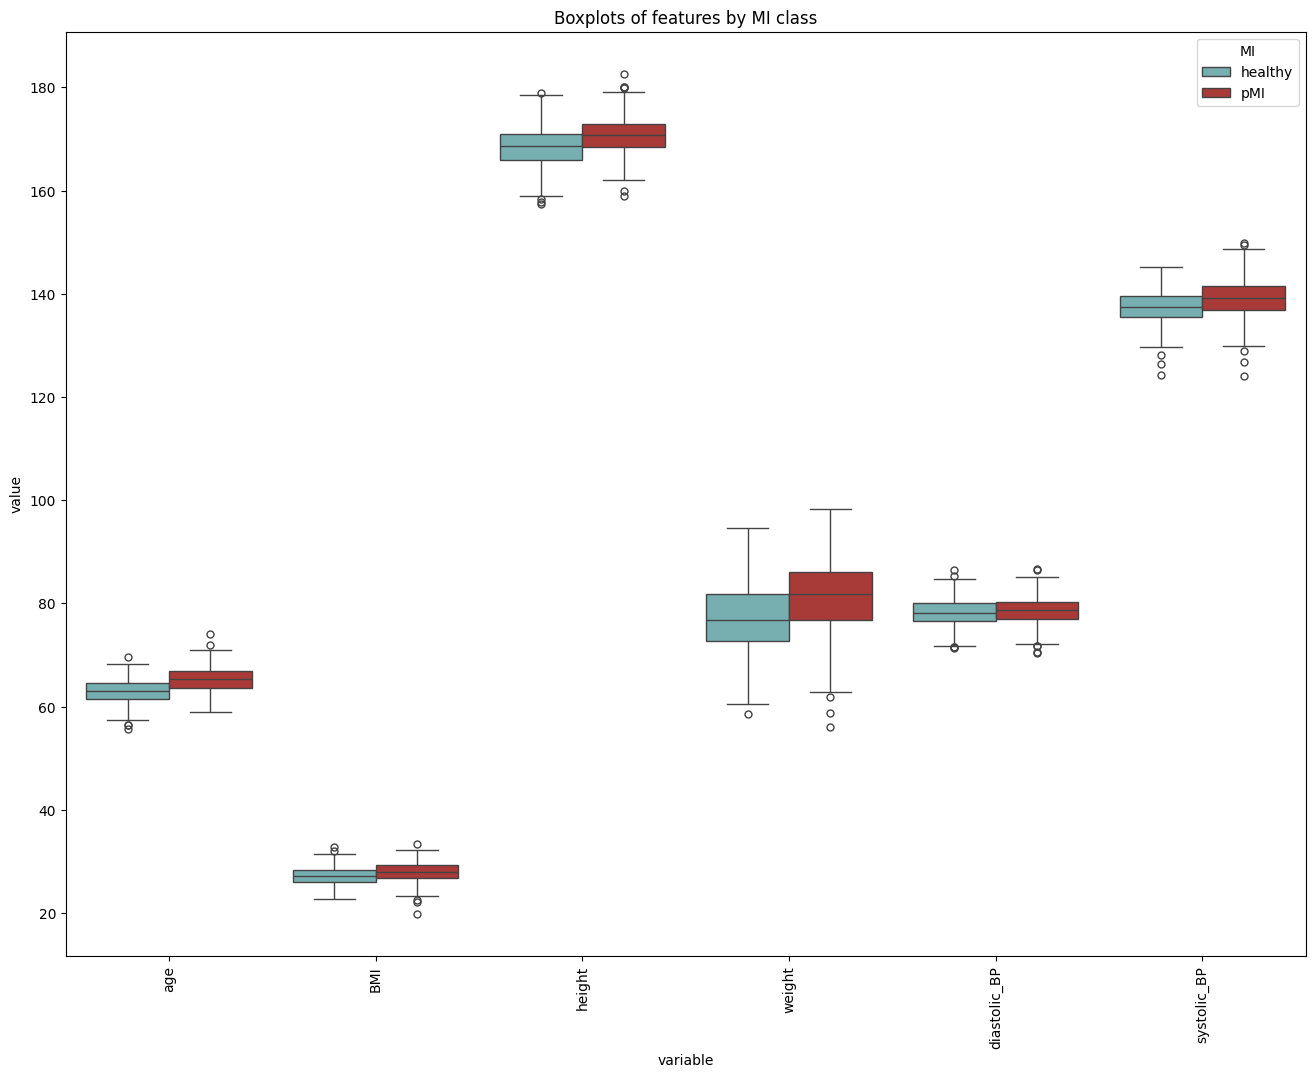

In [77]:
plt.figure(figsize=(16,12))
sns.boxplot(
    x="variable",
    y="value",
    hue="MI",
    data=df_to_explore.melt(id_vars="MI", value_vars=numeric_feature_columns),
    fliersize=5,
    palette = ['#6EB8BA', '#BB2A25']
)
plt.xticks(rotation=90)
plt.title("Boxplots of features by MI class")
plt.legend(title="MI")
plt.show()

/var/folders/zd/5hy9jtw13r9cz1y4151kdl_00000gs/T/ipykernel_1100/2090457193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


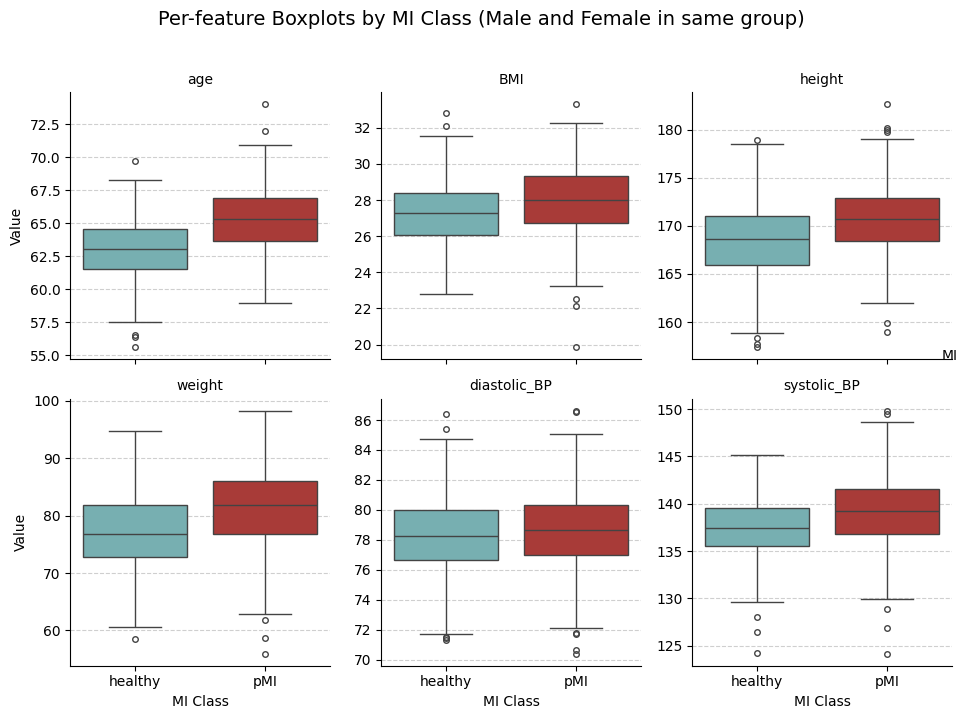

In [82]:
# make one subplot per variable
g = sns.catplot(
    data=df_to_explore.melt(id_vars="MI", value_vars=numeric_feature_columns),
    x="MI",                 # MI on x-axis
    y="value",
    col="variable",         # facet by variable (one subplot per feature)
    kind="box",
    col_wrap=3,             # how many per row
    height=3.5,             # subplot height
    aspect=0.9,             # width/height ratio
    fliersize=4,
    palette=['#6EB8BA', '#BB2A25'],
    sharey=False
)

# clean up titles and labels
g.set_titles("{col_name}")  # removes 'variable = ...'
g.set_axis_labels("MI Class", "Value")
for ax in g.axes.flatten():
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

g.add_legend(title="MI")
g.fig.suptitle("Per-feature Boxplots by MI Class (Male and Female in same group)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
#correlation between sex and condition
pd.crosstab(df_to_explore['MI'], df_to_explore['sex'])

sex,Female,Male
MI,,
healthy,250,202
pMI,88,360


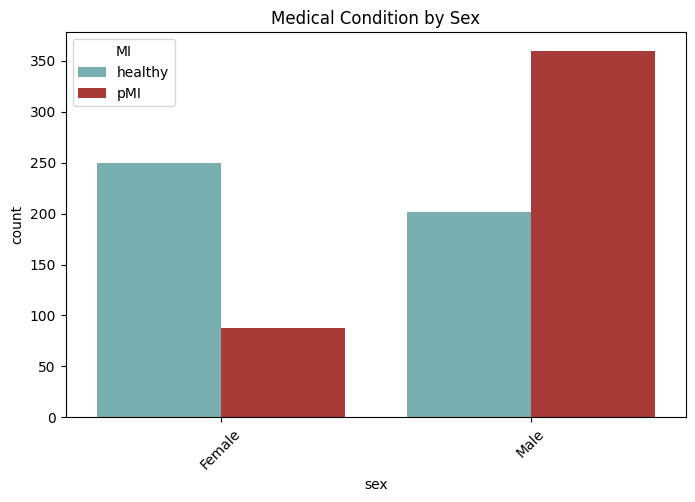

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_to_explore,
    x='sex',
    hue='MI',
    palette = ['#6EB8BA', '#BB2A25']
)
plt.title('Medical Condition by Sex')
plt.xticks(rotation=45)
plt.show()

#false is female

/var/folders/zd/5hy9jtw13r9cz1y4151kdl_00000gs/T/ipykernel_1100/230037573.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group_order, rotation=45, ha='right', fontsize=11)
/var/folders/zd/5hy9jtw13r9cz1y4151kdl_00000gs/T/ipykernel_1100/230037573.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group_order, rotation=45, ha='right', fontsize=11)
/var/folders/zd/5hy9jtw13r9cz1y4151kdl_00000gs/T/ipykernel_1100/230037573.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group_order, rotation=45, ha='right', fontsize=11)
/var/folders/zd/5hy9jtw13r9cz1y4151kdl_00000gs/T/ipykernel_1100/230037573.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of tic

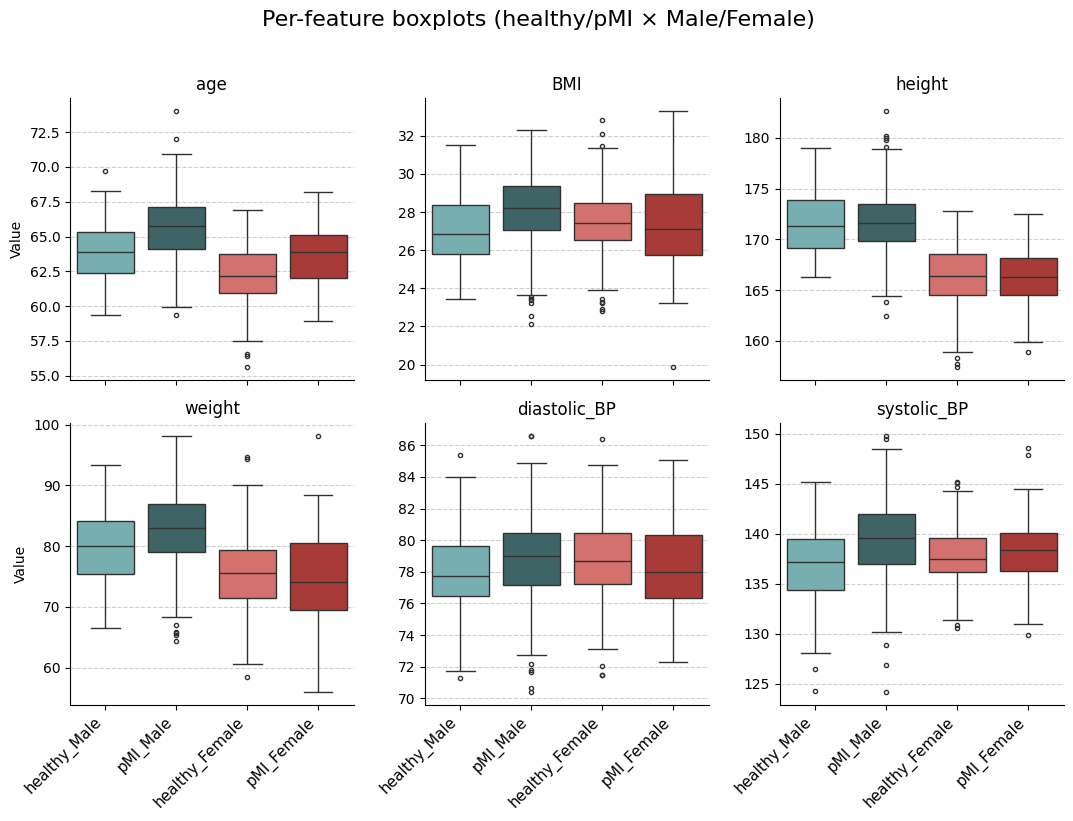

In [ ]:

# make sure melted exists 
melted = df_to_explore.melt(
    id_vars=["MI", "sex"],
    value_vars=numeric_feature_columns,
    var_name="variable",
    value_name="value"
)

# Map/format MI values into friendly labels if needed
# Example: if MI values are 0/1, convert to 'healthy'/'pMI'
melted['MI_label'] = melted['MI'].map({0: 'healthy', 1: 'pMI'}) if melted['MI'].dtype.kind in 'biu' else melted['MI']

# Create combined group column exactly as you specified
melted['MI_sex'] = melted['MI_label'].astype(str) + '_' + melted['sex'].astype(str)

# Define the group order (controls left-to-right order in each subplot)
group_order = ['healthy_Male', 'pMI_Male', 'healthy_Female', 'pMI_Female']

# Define a custom palette dict (keys must match the MI_sex values)
palette = {
    "pMI_Male":        "#376A6C",
    "healthy_Female":  "#E3615C",
    "pMI_Female":      "#BB2A25",
    "healthy_Male":    "#6EB8BA",
}
# (You can reorder/choose hex codes however you like.)

# Facet by feature: one subplot per 'variable'
g = sns.catplot(
    data=melted,
    x="MI_sex",
    y="value",
    col="variable",
    kind="box",
    hue="MI_sex",
    col_wrap=3,            # how many plots per row; change as needed
    height=4,            # height of each subplot
    aspect=0.9,            # width/height ratio of each subplot
    order=group_order,
    palette=palette,
    fliersize=3,
    sharey=False,          # set True if you want same y-axis across features
    dodge=False            # not needed because x is the grouped variable already
)

g.set_titles("{col_name}")


# aesthetics
for ax in g.axes.flatten():
    ax.set_xlabel('')   
    ax.set_title(ax.get_title(), fontsize=12)  # or adjust as needed    
    ax.set_xticklabels(group_order, rotation=45, ha='right', fontsize=11)
    ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.6)

g.set_axis_labels("", "Value")
g.fig.suptitle("Per-feature boxplots (healthy/pMI × Male/Female)", y=1.02, fontsize=16)
g.fig.subplots_adjust(wspace=0.8, hspace=1.5)


plt.tight_layout()
plt.show()


In [15]:
#exploring proportions of each class in the data
# find proportion of each class in the data
value_counts = df_to_explore['MI'].value_counts()

# Calculate the proportion of each value
proportions = value_counts / len(df_to_explore)

# Display the result
print(proportions)


MI
healthy    0.502222
pMI        0.497778
Name: count, dtype: float64


Text(0.5, 1.0, 'Class proportions in the dataset')

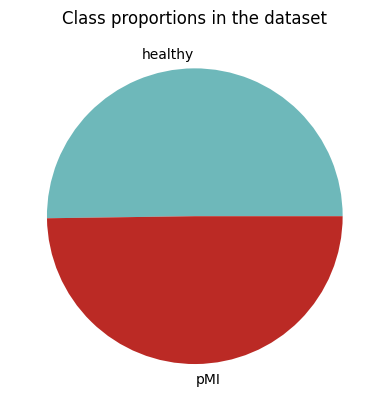

In [78]:
#proportions as a pie chart 
plt.figure()
plt.pie(proportions, labels = ['healthy','pMI'],colors=['#6EB8BA', '#BB2A25'])
plt.title('Class proportions in the dataset')

<Axes: >

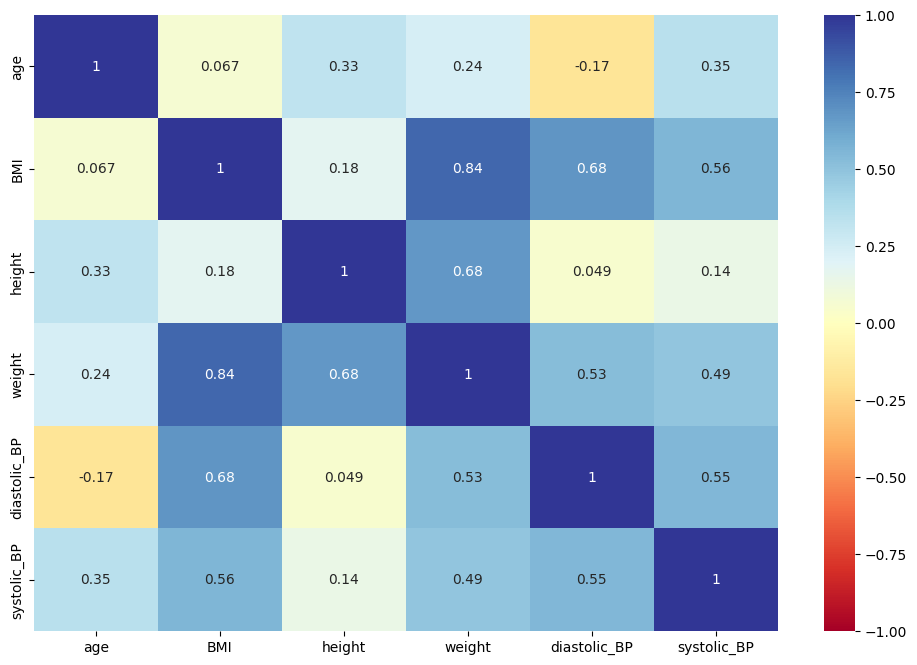

In [17]:
plt.figure(figsize=(12,8))
#pick diverging colourmap
sns.heatmap(df_to_explore[numeric_feature_columns].corr(), annot=True, cmap='RdYlBu', vmin = -1, vmax =1)

To note: BMI and weight are highly correlated 

---

## Exploring the point cloud data 

Point clouds are a way to represent a 3D object via densely packed verticies or "points" along the surface of the object.

## Advantages
- Accurate at representing fairly complex objects
- Quick to create

## Disadvantages
- Trades off precision obtained via using mathematical formulas
- No information about the surface itself is kept

In [18]:
# Loading one sample geometry
geometry0 = np.load("../data:/training_data/mixed_samples/0healthy.npy")
geometry0.shape

(10, 18000, 4)

Here we see that the dimensions of this tensor is 10 by 18000 by 4

- 10 points in the Cardiac Cycle
- 18000 represents the number of points in each point cloud
- 4 are the attributes of each point: x, y, z and part of the heart

In [19]:
geometry0[:,0]

array([[-20.157444  ,  17.62280464,   8.63055611,   2.        ],
       [-19.19090843,  17.49430275,   9.2532053 ,   2.        ],
       [-18.31469727,  14.26771927,   9.15201092,   2.        ],
       [-17.53883934,  14.00244427,   9.49431133,   2.        ],
       [-17.71179771,  16.30875587,   9.09440136,   2.        ],
       [-18.05838203,  17.30946922,   8.64347363,   2.        ],
       [-17.56122208,  17.19486809,   8.33184052,   2.        ],
       [-16.94767761,  17.58188248,   8.41529942,   2.        ],
       [-17.08619308,  17.50915909,   8.74868774,   2.        ],
       [-17.59795189,  17.17084503,   8.01866531,   2.        ]])

In [20]:
geometry0[0,:,0]



array([-20.157444  , -20.09103012, -20.10420418, ..., -17.84309578,
       -16.25856209, -15.38268089], shape=(18000,))

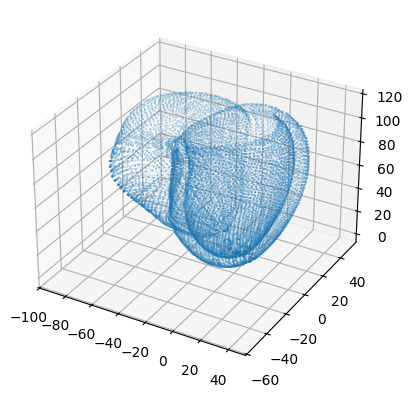

In [21]:
# Plotting a point cloud
fig = plt.figure()
ax = plt.axes(projection='3d')

xs = geometry0[0,:,0]
ys = geometry0[0,:,1]
zs = geometry0[0,:,2]
#heart_part = geometry0[0,:,3]

ax.scatter3D(xs,ys,zs, s = 0.05)
